In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [67]:
data=pd.read_csv('/content/y2019_male.csv',encoding='cp949')
data.columns

Index(['Unnamed: 0', 'S_SI', 'MH', 'SCHOOL', 'STYPE', 'CTYPE', 'E_RES',
       'E_SES', 'E_S_RCRD', 'GRADE', 'PR_HT', 'PR_BI', 'F_BR', 'PA_MSC', 'bmi',
       'WC_MN', 'M_STR', 'M_SLP_EN', 'M_SAD', 'M_SUI_CON', 'M_SUI_PLN',
       'M_SUI_ATT', 'V_TRT', 'AC_LT', 'AC_FAGE', 'AC_DAYS', 'AC_AMNT',
       'AC_ACCESS', 'TC_A_LT', 'TC_FAGE', 'TC_ACCESS', 'DR_EXP', 'SEX',
       'S_EDU', 'MF', 'RF', 'FN2', 'parents2', 'INT_WK_MM', 'INT_WD_MM'],
      dtype='object')

In [68]:
data.set_index(keys='Unnamed: 0',inplace=True) #index를 Unnamed: 0으로 바꿔줌
data.dropna(inplace=True)

In [ ]:
print(data.dtypes)
print('\n')
print(data.head(10))

In [ ]:
a = ['S_SI', 'MH', 'SCHOOL', 'STYPE', 'CTYPE', 'E_RES',
       'E_SES', 'E_S_RCRD', 'GRADE', 'PR_HT', 'PR_BI', 'F_BR', 'PA_MSC', 'bmi',
       'WC_MN', 'M_STR', 'M_SLP_EN', 'M_SAD', 'M_SUI_CON', 'M_SUI_PLN',
       'M_SUI_ATT', 'V_TRT', 'AC_LT', 'AC_FAGE', 'AC_DAYS', 'AC_AMNT',
       'AC_ACCESS', 'TC_A_LT', 'TC_FAGE', 'TC_ACCESS', 'DR_EXP', 'SEX',
       'S_EDU', 'MF', 'RF', 'FN2', 'parents2', 'INT_WK_MM', 'INT_WD_MM']


for i in a:
  data[i] = data[i].astype('category')

for i in a:
  print(data[i].unique)

In [70]:
data['MH'].replace({'고등학교':0,'중학교': 1}, inplace=True)
data['SCHOOL'].replace({'일반계고':0,'중학교': 1,'특성화계고':2}, inplace=True)
data['STYPE'].replace({'남녀공학':0,'남학교': 1}, inplace=True)
data['CTYPE'].replace({'군지역':0,'대도시': 1,'중소도시':2}, inplace=True)

for i in a:
  data[i] = data[i].astype('category')

In [ ]:
data.dtypes

In [81]:
data.dropna()
datas = data[['MH', 'SCHOOL', 'STYPE', 'CTYPE', 'E_RES',
       'E_SES', 'E_S_RCRD', 'GRADE', 'PR_HT', 'PR_BI', 'F_BR', 'PA_MSC', 'bmi',
       'WC_MN', 'M_STR', 'M_SLP_EN', 'M_SAD', 'M_SUI_CON', 'M_SUI_PLN',
       'M_SUI_ATT', 'V_TRT', 'AC_LT', 'AC_FAGE', 'AC_DAYS', 'AC_AMNT',
       'AC_ACCESS', 'TC_A_LT', 'TC_FAGE', 'TC_ACCESS', 'DR_EXP', 'SEX',
       'S_EDU', 'MF', 'RF', 'FN2', 'parents2', 'INT_WK_MM', 'INT_WD_MM']]

data_target = data['S_SI']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(
    datas, data_target, stratify=data_target, random_state=42) #stratify 값을 target으로 지정해주면 각각의 class 비율(ratio)을 train / validation에 유지

tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.938
테스트 세트 정확도: 0.937


In [84]:
print("특성 중요도:\n{}".format(tree.feature_importances_))

특성 중요도:
[0.         0.         0.         0.         0.         0.
 0.00487727 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00348173 0.03135313 0.01971035 0.00804126
 0.12224157 0.04834941 0.         0.1646578  0.59728748 0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


In [86]:
data.shape[1]

39

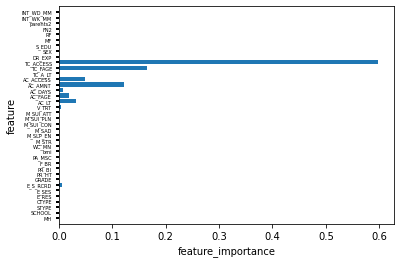

In [95]:
def plot_feature_importances_cancer(model):
    n_features = datas.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), datas.columns)
    plt.tick_params(axis='y',  labelsize=5, width=2)
    plt.xlabel("feature_importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)
    plt.savefig('savefig_default.png',dpi=200)

plot_feature_importances_cancer(tree)